/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.03717D+01    |proj g|=  5.18646D-01

At iterate    5    f=  1.01995D+01    |proj g|=  7.92415D-03

At iterate   10    f=  1.01983D+01    |proj g|=  1.49110D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     15      1     0     0   2.431D-06   1.020D+01
  F =   10.198304685316822     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
Predicción para el próximo mes:
3307257.549042002
Predicción para los 

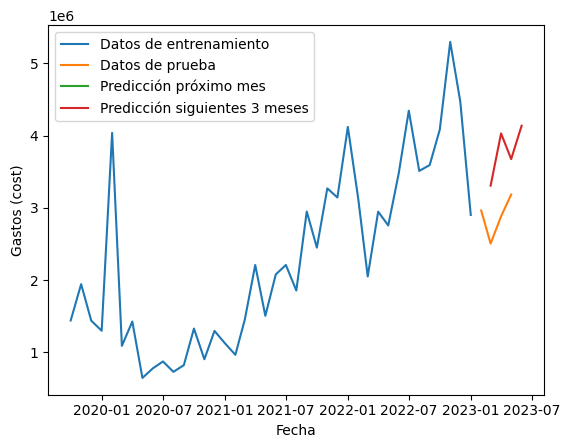

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
path_load = "../../data/"
file_name = "processed/df_time_monthly.csv"
full_path = path_load + file_name
# Cargar los datos
data = pd.read_csv(full_path, parse_dates=['date'], index_col='date')

# Dividir los datos en conjunto de entrenamiento y prueba
train_data = data.loc[:'2022-12-31', 'cost']
test_data = data.loc['2023-01-31':, 'cost']

# Ajustar el modelo SARIMA
order = (1, 1, 1)  # Orden (p, d, q)
seasonal_order = (0, 1, 1, 12)  # Orden estacional (P, D, Q, s)
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Realizar predicciones
next_month_pred = model_fit.get_prediction(start=pd.to_datetime('2023-02-28'), end=pd.to_datetime('2023-02-28'))
next_month_forecast = next_month_pred.predicted_mean[0]
next_3_months_pred = model_fit.get_prediction(start=pd.to_datetime('2023-02-28'), end=pd.to_datetime('2023-05-31'))
next_3_months_forecast = next_3_months_pred.predicted_mean
# Puedes ajustar las fechas de inicio y fin según tus necesidades

# Imprimir las predicciones
print('Predicción para el próximo mes:')
print(next_month_forecast)
print('Predicción para los siguientes 3 meses:')
print(next_3_months_forecast)

# Visualizar los datos históricos y las predicciones
plt.plot(train_data.index, train_data, label='Datos de entrenamiento')
plt.plot(test_data.index, test_data, label='Datos de prueba')
plt.plot(next_month_pred.predicted_mean.index, next_month_pred.predicted_mean, label='Predicción próximo mes')
plt.plot(next_3_months_pred.predicted_mean.index, next_3_months_pred.predicted_mean, label='Predicción siguientes 3 meses')
plt.xlabel('Fecha')
plt.ylabel('Gastos (cost)')
plt.legend()
plt.show()


--------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
path_load = "../../data/"
file_name = "processed/df_time_monthly.csv"
full_path = path_load + file_name
# Cargar los datos
data = pd.read_csv(full_path, parse_dates=['date'], index_col='date')

# Definir el tamaño de la ventana deslizante (en meses)
window_size = 12

# Inicializar una lista para almacenar los errores de cada modelo
model_errors = []

# Iterar a través de diferentes ventanas deslizantes
for i in range(len(data) - window_size):
    # Definir los conjuntos de entrenamiento y prueba para la ventana actual
    train_data = data.iloc[i:i+window_size, :]
    test_data = data.iloc[i+window_size:i+window_size+1, :]

    # Ajustar el modelo ARIMA
    model = ARIMA(train_data['cost'], order=(1, 0, 0))
    model_fit = model.fit()

    # Realizar predicciones
    predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

    # Calcular el error RMSE
    error = np.sqrt(mean_squared_error(test_data['cost'], predictions))
    
    # Agregar el error a la lista
    model_errors.append(error)

# Calcular el error promedio de todos los modelos
average_error = np.mean(model_errors)

# Imprimir el error promedio
print('Error promedio:', average_error)


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

Error promedio: 564943.051970417


/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dat

2023-06-24 14:09:15.205576: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 14:09:15.207698: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 14:09:15.209370: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Epoch 1/50


2023-06-24 14:09:15.721614: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 14:09:15.723138: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 14:09:15.725052: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 3s 3s/step - loss: 0.1664
Epoch 2/50
1/1 [==============================] - 0s 8ms/step - loss: 0.1456
Epoch 3/50
1/1 [==============================] - 0s 10ms/step - loss: 0.1261
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 0.1076
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0898
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0730
Epoch 7/50
1/1 [==============================] - 0s 11ms/step - loss: 0.0572
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0433
Epoch 9/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0322
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 0.0252
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0239
Epoch 12/50
1/1 [==============================] - 0s 9ms/step - loss: 0.0286
Epoch 13/50
1/1 [==============================] - 0s 11ms/step - loss: 0.035

2023-06-24 14:09:19.382823: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-24 14:09:19.384000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-24 14:09:19.384945: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 580ms/step
RMSE: 1096556.349672842


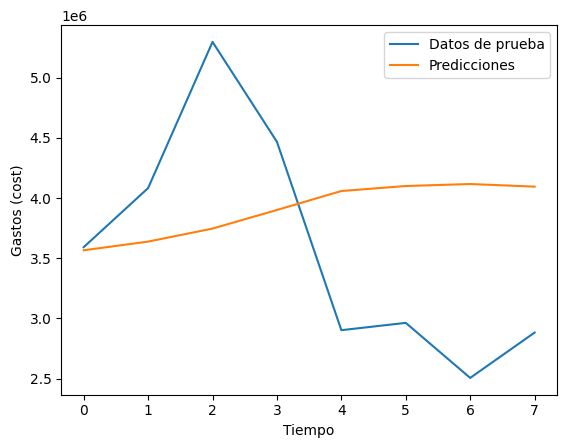

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

path_load = "../../data/"
file_name = "processed/df_time_monthly.csv"
full_path = path_load + file_name
# Cargar los datos
data = pd.read_csv(full_path, parse_dates=['date'], index_col='date')

# Extraer la variable objetivo (cost)
target_variable = data['cost'].values

# Escalar los datos entre 0 y 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(target_variable.reshape(-1, 1))

# Dividir los datos en conjunto de entrenamiento y prueba
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size, :]
test_data = scaled_data[train_size-seq_length:, :]


# Crear secuencias de entrada y salida para el modelo LSTM
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length - 1):
        X.append(data[i:i+seq_length, 0])
        y.append(data[i+seq_length, 0])
    return np.array(X), np.array(y)


seq_length = 12  # Longitud de la secuencia de entrada
X_train, y_train = create_sequences(train_data, seq_length)
X_test, y_test = create_sequences(test_data, seq_length)

# Reshape de los datos para que sean compatibles con el modelo LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Definir el modelo LSTM
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compilar y entrenar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Desescalar las predicciones
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # Desescalar los datos de prueba

# Calcular el error RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse)

# Visualizar los resultados
plt.plot(y_test, label='Datos de prueba')
plt.plot(y_pred, label='Predicciones')
plt.xlabel('Tiempo')
plt.ylabel('Gastos (cost)')
plt.legend()
plt.show()
